In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
#helper function to plot an image. 
#open cv reads the image in BGR format,so we have to first convert the image to RGB and then plot it.
def plot(image):
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)


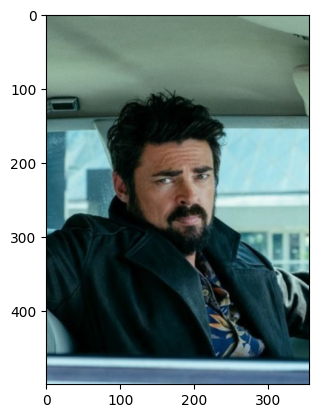

In [3]:
img= cv2.imread("billy-butcher-7687548-normal.jpg")
plot(img)

In [4]:
#function thats create pencil sketch like effect of an image. 
#it accepts image and spits out image.
def sketch(img):
    gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    invert_img= cv2.bitwise_not(gray_img)
    
    smooth_invert = cv2.GaussianBlur(invert_img, (27,27),sigmaX=0,sigmaY=0)

    def dodgev2(x,y):
        return cv2.divide(x,255-y, scale=256)
     
    final_image = dodgev2(gray_img, smooth_invert)
    
    return final_image

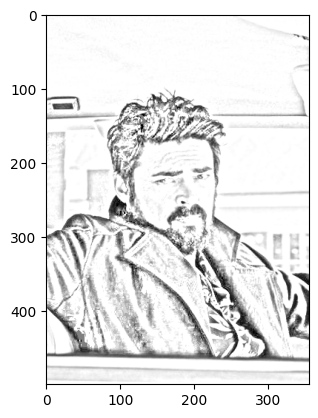

In [5]:
sketched_image=sketch(img)
plot(sketched_image)


In [6]:
def cartoonify(img):
    num_filters = 1
    
    for i in range(num_filters):
        img_color = cv2.bilateralFilter(img, d=9,sigmaColor=9,sigmaSpace=7)
        
    img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_blur= cv2.medianBlur(img_gray,5)
    
    img_edge= cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,C=9)
    
    img_edge= cv2.cvtColor(img_edge,cv2.COLOR_GRAY2RGB)
    
    img_cartoon= cv2.bitwise_and(img_color, img_edge)
    
    return img_cartoon

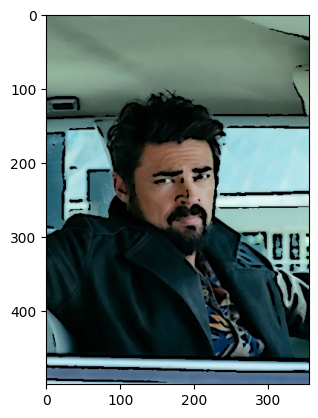

In [7]:
cartoon_image=cartoonify(img)
plot(cartoon_image)

In [8]:
def max_cartoonify(img):
    num_filters = 5
    img_color = img.copy()
    for _ in range(num_filters):
        img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.medianBlur(img_gray, 7)
    img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)  # Adjust the block size and C
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    img_cartoon = cv2.bitwise_and(img_color, img_edge)
    return img_cartoon

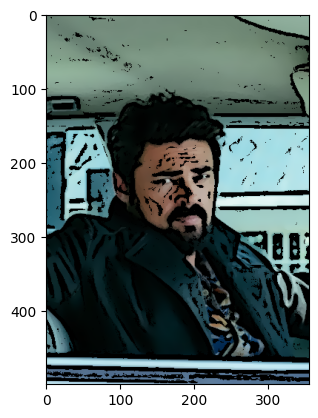

In [9]:
maxcartoon_image=max_cartoonify(img)
plot(maxcartoon_image)